In [ ]:
import numpy as np
import pandas as pd

In [ ]:
! pip install openpyxl==3.0.9

In [ ]:
agency = pd.read_excel('pune_static_updated1.xlsx', sheet_name = 'agency.csv')
calender = pd.read_excel('pune_static_updated1.xlsx', sheet_name = 'calendar.csv')
routes = pd.read_excel('pune_static_updated1.xlsx', sheet_name = 'routes.csv')
shapes = pd.read_excel('pune_static_updated1.xlsx', sheet_name = 'shapes.csv')
stop_times = pd.read_excel('pune_static_updated1.xlsx', sheet_name = 'stop_times.csv')
stops = pd.read_excel('pune_static_updated1.xlsx', sheet_name = 'stops.csv')
trips = pd.read_excel('pune_static_updated1.xlsx', sheet_name = 'trips.csv')

In [ ]:
routes.drop('route_short_name', axis='columns')
routes.drop('route_type', axis='columns')
trips.drop('service_id', axis='columns')

,route_id,trip_id,trip_headsign,direction_id,shape_id,duty,duty_sequence_number,run_sequence_number
0,42,NORMAL_42_Katraj To Bhakti Shakti_Up-0740_0,Katraj To Bhakti Shakti,0,4810,42/10,1,1
1,42,NORMAL_42_Bhakti Shakti To Katraj_Down-2010_0,Bhakti Shakti To Katraj,0,4811,42/5,8,4
2,366,NORMAL_366_Pune Station To Bhakti Shakti (Via ...,Pune Station To Bhakti Shakti (Via Yerwada),0,4794,366/1,10,4
3,42,NORMAL_42_Katraj To Bhakti Shakti_Up-0655_0,Katraj To Bhakti Shakti,0,4810,42/7,1,1
4,366,NORMAL_366_Bhakti Shakti To Pune Station (Via ...,Bhakti Shakti To Pune Station (Via Yerwada),0,4795,366/3,7,1
...,...,...,...,...,...,...,...,...
21799,209_96,NORMAL_209_Saswad Bus Stand To Katraj_Down-1705_0,Saswad Bus Stand To Katraj,1,5245,209/8,8,2
21800,209_96,NORMAL_209_Katraj To Saswad Bus Stand_Up-1845_0,Katraj To Saswad Bus Stand,1,5244,209/8,9,3
21801,209_96,NORMAL_209_Saswad Bus Stand To Katraj_Down-2000_0,Saswad Bus Stand To Katraj,1,5245,209/8,10,4
21802,209_96,NORMAL_209_Katraj To Saswad Bus Stand_Up-2130_0,Katraj To Saswad Bus Stand,1,5244,209/8,11,5


In [ ]:
import re
from datetime import datetime, time
def timew(i):
    pattern = '\A\d{2}:\d{2}:\d{2}'
    s = str(stop_times['departure_time'][i])
    s1 = str(stop_times['arrival_time'][i+1])
    if ( re.search(pattern, s) and re.search(pattern,s1)):
      FMT = '%H:%M:%S'
      tdelta = datetime.strptime(s1, FMT) - datetime.strptime(s, FMT)
      a = tdelta.seconds/3600
    else:
      a=0.018333333333333333
    return a  

for i in range(0,len(stop_times['arrival_time'])-1):
    b = timew(i)
    stop_times['time'][0] = 'NaN'
    stop_times['time'][i+1] = b

In [ ]:
stop_times['time']

0              NaN
1         0.003889
2         0.017500
3         0.008611
4         0.021667
            ...   
751847    0.007222
751848    0.008056
751849    0.007500
751850    0.000278
751851    0.022500
Name: time, Length: 751852, dtype: float64

In [ ]:
def haversine(lon1, lat1, lon3, lat3):                                                                                                                                  
    lon1, lat1, lon3, lat3 = map(np.radians, [lon1, lat1, lon3, lat3])                                                  
    a = np.sin((lat3) / 2.0)**2 + (np.cos(lat1) * np.cos(lat1+lat3) * np.sin((lon3) / 2.0)**2)                 
    distance = 6371 * 2 * np.arcsin(np.sqrt(a))                                                                         
    return distance   

    

In [ ]:
stop_times['dist'] = haversine(stop_times['stop_lon'],stop_times['stop_lat'],abs(stop_times['stop_lon'].diff()),abs(stop_times['stop_lat'].diff()))

In [ ]:
print(stop_times['dist'])

0              NaN
1         0.372396
2         0.478335
3         0.330991
4         0.711287
            ...   
751847    0.339072
751848    0.270447
751849    0.289718
751850    0.097810
751851    0.799525
Name: dist, Length: 751852, dtype: float64


In [ ]:
stop_times['velocity'] = stop_times['dist']/stop_times['time']

In [ ]:
for i in range(0,len(stop_times['stop_sequence'])):
  if(stop_times['stop_sequence'][i]==1):
    stop_times['velocity'][i] = 'NaN'
    stop_times['time'][i] = 'NaN'
    stop_times['dist'][i] = 'NaN'

In [ ]:
stop_times['velocity']

0                NaN
1          95.759011
2          27.333415
3          38.437651
4          32.828650
             ...    
751847     46.948410
751848     33.572778
751849     38.629126
751850    352.115380
751851     35.534440
Name: velocity, Length: 751852, dtype: float64

In [ ]:
stop_times.to_csv('speed.csv')

In [ ]:
import seaborn as sns
cormat = stop_times.corr()
round(cormat,2)

,stop_id,stop_sequence,stop_lat,stop_lon,dist,time,velocity
stop_id,1.00,0.00,-0.07,-0.01,-0.02,-0.01,0.01
stop_sequence,0.00,1.00,0.04,-0.04,0.03,-0.00,-0.00
stop_lat,-0.07,0.04,1.00,-0.29,0.02,-0.01,-0.00
stop_lon,-0.01,-0.04,-0.29,1.00,0.01,0.01,-0.00
dist,-0.02,0.03,0.02,0.01,1.00,0.11,0.57
time,-0.01,-0.00,-0.01,0.01,0.11,1.00,-0.02
velocity,0.01,-0.00,-0.00,-0.00,0.57,-0.02,1.00


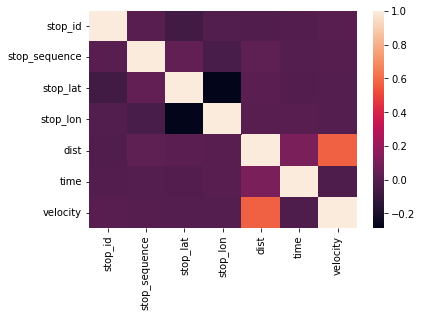

In [ ]:
sns.heatmap(cormat);